In [217]:
#Import dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [218]:
csv_link = 'https://raw.githubusercontent.com/SchoolofAI-Algiers/AI2E-workshops/master/Data_exploration/data/vtc_data.csv'

In [219]:
data_vtc = pd.read_csv(csv_link)
data_vtc.head()

,travel_id,travel_type,car_type,driver_id,address_of_departure,arrival_address,lat_and_long_of_arrival_address,date_of_travel,time_of_travel,estimated_time,distance,options,state,price
0,27550488,advance,Mini Citadine,NaN,"AXA Assurances Algérie, Boulevard du 11 Decemb...","Clinique Krim Belkacem, Boulevard Colonel Krim...","36.770681600000003,3.0510609999999998",2019-09-29 23:55:00,23:55:00,13,6053.0,NaN,cancelled,0.0
1,28026204,live,Mini Citadine,43166.0,Unnamed Road Dar El Beïda,"136 logements, bloc D، Route de Ouled Fayet Ch...","36.745614799999998,2.9428641",2019-09-29 23:54:36,23:54:00,33,31895.0,NaN,finished,133300.0
2,28026119,live,Mini Citadine,30759.0,"Office Riadh El Feth ,bois des arcades ,El Mad...","79 Rue Fabri MARCELLO, Bir Mourad Raïs, 阿尔及利亚","36.736257999999999,3.0616660000000002",2019-09-29 23:54:27,23:54:00,7,3056.0,NaN,finished,32600.0
3,28025871,live,Mini Citadine,32536.0,N24 Bordj El Kiffan,"Dar El Beïda, Algeria","36.727856899999999,3.2181302000000001",2019-09-29 23:47:25,23:47:00,7,6092.0,NaN,finished,38300.0
4,28026102,live,Mini Citadine,40592.0,"Lily Rose, Hydra, Algeria","214 résidence، Bois des Cars 2, Deli Ibrahim, ...","36.753667999999998,2.9762750000000002",2019-09-29 23:46:35,23:46:00,11,6928.0,NaN,finished,47800.0


In [220]:
data_vtc.describe()

,travel_id,driver_id,estimated_time,distance,price
count,6.533500e+04,60229.000000,65335.000000,65078.000000,6.512100e+04
mean,2.698962e+07,36458.806904,20.731981,12456.091091,4.291896e+04
std,5.911326e+05,5170.877670,21.092258,16331.355123,4.961151e+04
min,1.147333e+07,14770.000000,0.000000,0.000000,-6.800000e+04
25%,2.646277e+07,32376.000000,11.000000,4851.000000,0.000000e+00
50%,2.691974e+07,36638.000000,17.000000,8960.500000,3.820000e+04
75%,2.751333e+07,41457.000000,26.000000,16490.750000,6.080000e+04
max,2.805757e+07,44197.000000,618.000000,575798.000000,2.250000e+06


In [221]:
data_vtc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65335 entries, 0 to 65334
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   travel_id                        65335 non-null  int64  
 1   travel_type                      65335 non-null  object 
 2   car_type                         65335 non-null  object 
 3   driver_id                        60229 non-null  float64
 4   address_of_departure             65335 non-null  object 
 5   arrival_address                  65292 non-null  object 
 6   lat_and_long_of_arrival_address  65292 non-null  object 
 7   date_of_travel                   65335 non-null  object 
 8   time_of_travel                   65121 non-null  object 
 9   estimated_time                   65335 non-null  int64  
 10  distance                         65078 non-null  float64
 11  options                          1152 non-null   object 
 12  state             

In [222]:
data_vtc.shape

(65335, 14)

In [223]:
#Checking First Date and Last Date
print('First Date Of Data Collection : ',data_vtc['date_of_travel'].min())
print('Last Date Of Data Collection : ',data_vtc['date_of_travel'].max())

First Date Of Data Collection :  2019-08-26 18:35:57
Last Date Of Data Collection :  2019-09-29 23:55:00


In [224]:
data_vtc.columns

Index(['travel_id', 'travel_type', 'car_type', 'driver_id',
       'address_of_departure', 'arrival_address',
       'lat_and_long_of_arrival_address', 'date_of_travel', 'time_of_travel',
       'estimated_time', 'distance', 'options', 'state', 'price'],
      dtype='object')

In [225]:
features_name = [ 'travel_type', 'car_type','lat_and_long_of_arrival_address', 'date_of_travel', 'distance']
target_name = 'estimated_time'

In [226]:
features  = data_vtc[features_name]
target = data_vtc[target_name]

In [227]:
#Feature Engineering - Date of Travel Column Ex of Format : 2019-09-29 23:55:00 
features['date_of_travel'] = pd.DataFrame(pd.to_datetime(features.date_of_travel,format="%Y-%m-%d %H:%M:%S"))

#Create new columns Day_Name and Hour in the features DataFrame 
features['day_name'] = features['date_of_travel'].dt.day_name()
features['hour'] = features['date_of_travel'].dt.hour

#Drop date_travel
features.drop(['date_of_travel'],axis = 1,inplace = True )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [228]:
features.head(3)

,travel_type,car_type,lat_and_long_of_arrival_address,distance,day_name,hour
0,advance,Mini Citadine,"36.770681600000003,3.0510609999999998",6053.0,Sunday,23
1,live,Mini Citadine,"36.745614799999998,2.9428641",31895.0,Sunday,23
2,live,Mini Citadine,"36.736257999999999,3.0616660000000002",3056.0,Sunday,23


In [229]:
#Spliting Lat and Long 
features[['lat','lon']] = features.lat_and_long_of_arrival_address.str.split(',',expand=True)
features['lat'] = pd.to_numeric(features.lat,downcast = 'float')
features['lon'] = pd.to_numeric(features.lon,downcast = 'float')
features.drop(['lat_and_long_of_arrival_address'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [230]:
features.head(3)

,travel_type,car_type,distance,day_name,hour,lat,lon
0,advance,Mini Citadine,6053.0,Sunday,23,36.770683,3.051061
1,live,Mini Citadine,31895.0,Sunday,23,36.745613,2.942864
2,live,Mini Citadine,3056.0,Sunday,23,36.736259,3.061666


In [231]:
#Handle Missing Values
features.isnull().sum()

travel_type      0
car_type         0
distance       257
day_name         0
hour             0
lat             43
lon             43
dtype: int64

In [232]:
#Replace the missing values with the mean 
features['distance'].fillna(features['distance'].mean(),inplace = True)
features['lat'].fillna(features['lat'].mean(),inplace = True)
features['lon'].fillna(features['lon'].mean(),inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [233]:
features.isnull().sum()

travel_type    0
car_type       0
distance       0
day_name       0
hour           0
lat            0
lon            0
dtype: int64

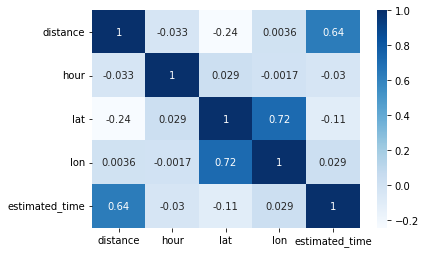

In [234]:
#Data Viz 
correlation  = pd.concat([features,target],axis=1).corr()
sns.heatmap(correlation,cbar=True,cmap="Blues",annot=True)

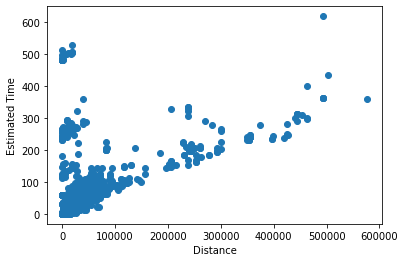

In [235]:
plt.scatter(features['distance'],target)
plt.xlabel('Distance')
plt.ylabel('Estimated Time')
plt.show()

In [236]:
features = features[target<400]
target = target[target<400]

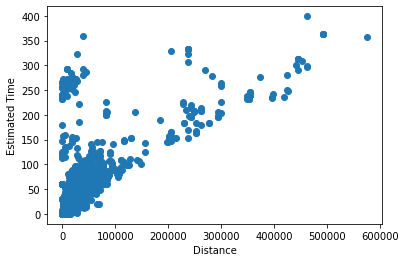

In [237]:
plt.scatter(features['distance'],target)
plt.xlabel('Distance')
plt.ylabel('Estimated Time')
plt.show()

In [238]:
#One-Hot-Encoding 
def OneHotEncode(df,col):
  dfDummies = pd.get_dummies(df[col],prefix =col)
  df = pd.concat([df,dfDummies],axis = 1)

  df.drop([col],axis=1,inplace=True)

  return df 

In [239]:
for col in features : 
  if features[col].dtype == object : 
     print(col,' : ',features[col].unique() )

travel_type  :  ['advance' 'live' 'Personal']
car_type  :  ['Mini Citadine' 'Business' 'Moto' '2H' 'Citadine' 'vtc 8h' 'Livraison'
 '4H' 'Taxi' 'vtc 4h' 'Berline' 'Thakeraoust' 'Jet ski 2 places'
 'Yacht 8 places' 'Hors-bord 6 places']
day_name  :  ['Sunday' 'Saturday' 'Friday' 'Thursday' 'Wednesday' 'Tuesday' 'Monday']


In [240]:
features = OneHotEncode(features,'travel_type')
features = OneHotEncode(features,'car_type')
features = OneHotEncode(features,'day_name')
features.head()

,distance,hour,lat,lon,travel_type_Personal,travel_type_advance,travel_type_live,car_type_2H,car_type_4H,car_type_Berline,...,car_type_Yacht 8 places,car_type_vtc 4h,car_type_vtc 8h,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,6053.0,23,36.770683,3.051061,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,31895.0,23,36.745613,2.942864,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3056.0,23,36.736259,3.061666,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,6092.0,23,36.727856,3.218130,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,6928.0,23,36.753670,2.976275,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [241]:
#Scale the Data
def scale(df,cols) : 
  for col in cols :
    min = df[col].min()
    max  = df[col].max()
    df[col] = (df[col] - min ) / (max  - min)
  return df
features = scale(features,['distance','hour','lat','lon'])
features.head() 

,distance,hour,lat,lon,travel_type_Personal,travel_type_advance,travel_type_live,car_type_2H,car_type_4H,car_type_Berline,...,car_type_Yacht 8 places,car_type_vtc 4h,car_type_vtc 8h,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0.010512,1.0,0.939710,0.523338,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.055393,1.0,0.928505,0.511809,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.005307,1.0,0.924324,0.524467,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.010580,1.0,0.920568,0.541138,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.012032,1.0,0.932106,0.515369,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
